# Introducción

En esta práctica de Machine Learning, exploraremos el uso de árboles de decisión para la clasificación de problemas cardíacos. Los árboles de decisión son una técnica de aprendizaje supervisado que se utiliza para clasificar o predecir resultados basados en datos categóricos o continuos. Este tipo de modelo es altamente interpretable, lo que permite visualizar cómo se toman las decisiones en cada nivel del árbol, basándose en condiciones específicas de los datos.

## Dataset

El conjunto de datos utilizado en este ejercicio contiene información sobre individuos y sus niveles de colesterol, así como la presencia o ausencia de problemas cardíacos. Las columnas principales son:

- `edad`: Edad del individuo.
- `colesterol`: Nivel de colesterol (medido en mg/dL).
- `problema_cardiaco`: Variable de objetivo, donde `1` indica la presencia de un problema cardíaco y `0` su ausencia.

Este análisis nos permitirá entrenar un modelo de árbol de decisión para identificar patrones asociados a problemas cardíacos en función de la edad y los niveles de colesterol. Una vez entrenado, el modelo se podrá utilizar para predecir el riesgo de problemas cardíacos en nuevos datos.

# Gráfica dispersión: Edad y Colesterol

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

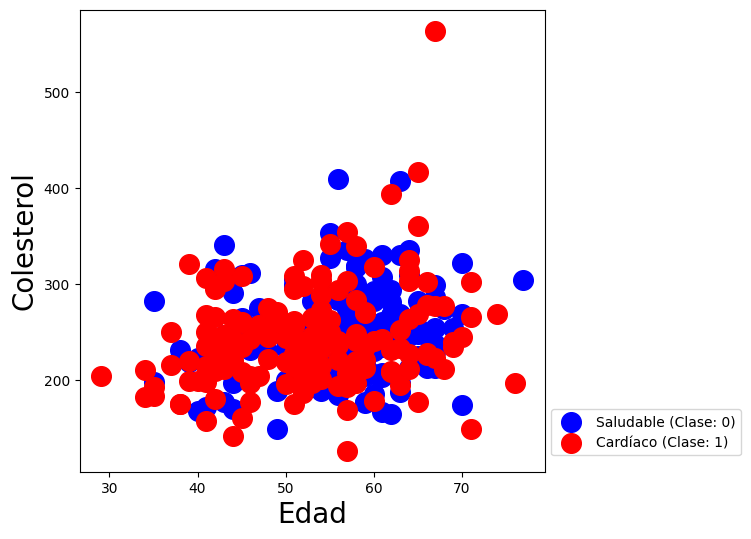

In [89]:
# Cargamos el archivo CSV que contiene los datos de los pacientes
# en un DataFrame de pandas llamado 'pacientes'
pacientes = pd.read_csv("pacientes.csv")

# Filtramos el DataFrame para obtener solo los registros de pacientes saludables
# donde el valor de 'problema_cardiaco' es igual a 0
saludables = pacientes[pacientes["problema_cardiaco"] == 0]

# Filtramos el DataFrame para obtener solo los registros de pacientes con problemas cardíacos
# donde el valor de 'problema_cardiaco' es igual a 1
cardiacos = pacientes[pacientes["problema_cardiaco"] == 1]

# Configuramos el tamaño de la figura para la visualización
plt.figure(figsize=(6, 6))

# Definimos la etiqueta del eje X como 'Edad' con un tamaño de fuente de 20
plt.xlabel('Edad', fontsize=20.0)

# Definimos la etiqueta del eje Y como 'Colesterol' con un tamaño de fuente de 20
plt.ylabel('Colesterol', fontsize=20.0)

# Generamos un diagrama de dispersión para los pacientes saludables
# Usamos 'edad' en el eje X y 'colesterol' en el eje Y
# Los puntos se marcan con un asterisco azul claro ('skyblue') de tamaño 200
plt.scatter(saludables["edad"], saludables["colesterol"], 
            label="Saludable (Clase: 0)", marker="o", c="blue", s=200)

# Generamos un diagrama de dispersión para los pacientes con problemas cardíacos
# Usamos 'edad' en el eje X y 'colesterol' en el eje Y
# Los puntos se marcan con un asterisco rojo claro ('lightcoral') de tamaño 200
plt.scatter(cardiacos["edad"], cardiacos["colesterol"],
            label="Cardíaco (Clase: 1)", marker="o", c="red", s=200)

# Mostramos la leyenda en la gráfica, posicionándola fuera de la figura principal
# para que no se superponga con los puntos
plt.legend(bbox_to_anchor=(1, 0.15))

# Mostramos la gráfica resultante con los datos de los pacientes saludables en azul y
# los pacientes con problemas cardíacos en rojo
plt.show()

---

# Explicando que es la Entropía
### Medida de la Información en Variables Aleatorias

La entropía es un concepto fundamental en teoría de la información que cuantifica la cantidad promedio de información contenida en una variable aleatoria. Se utiliza para medir la incertidumbre o aleatoriedad de un conjunto de posibles resultados. Cuanto mayor sea la entropía, mayor será la cantidad de información necesaria para describir el estado de la variable.


In [90]:
# Importamos la función 'entropy' de la biblioteca scipy.stats para calcular la entropía
from scipy.stats import entropy

# Importamos la función 'log' de la biblioteca math para calcular logaritmos
from math import log

# Creamos una Serie de pandas que contiene las edades de un conjunto de individuos
edades = pd.Series([40, 30, 20, 50])

# Creamos una Serie de pandas que contiene los niveles de colesterol de los mismos individuos
colesterol = pd.Series([100, 110, 100, 110])

# Calculamos la frecuencia relativa de cada edad en la Serie 'edades'
# value_counts() cuenta la cantidad de ocurrencias de cada valor y
# dividimos por el tamaño total de la Serie para obtener proporciones
print(edades.value_counts() / edades.size)

# Calculamos la frecuencia relativa de cada nivel de colesterol en la Serie 'colesterol'
# value_counts() cuenta la cantidad de ocurrencias de cada valor y
# dividimos por el tamaño total de la Serie para obtener proporciones
print(colesterol.value_counts() / colesterol.size)

# Calculamos la entropía de la distribución de edades utilizando la función 'entropy'
# Dividimos las cuentas de las edades por el tamaño total para obtener probabilidades
# Usamos logaritmo en base 2 para calcular la entropía en bits
print(entropy(edades.value_counts() / edades.size, base=2))

# Calculamos la entropía de la distribución de colesterol utilizando la función 'entropy'
# Dividimos las cuentas de los niveles de colesterol por el tamaño total para obtener probabilidades
# Usamos logaritmo en base 2 para calcular la entropía en bits
print(entropy(colesterol.value_counts() / colesterol.size, base=2))

40    0.25
30    0.25
20    0.25
50    0.25
Name: count, dtype: float64
100    0.5
110    0.5
Name: count, dtype: float64
2.0
1.0


Aquí tienes la explicación de los resultados generados por el código:

1. **Frecuencias relativas de las edades:**
   ```
   40    0.25
   30    0.25
   20    0.25
   50    0.25
   Name: count, dtype: float64
   ```
   - Este resultado muestra la frecuencia relativa de cada edad en la serie `edades`. 
   - Cada edad (40, 30, 20, 50) tiene una frecuencia relativa de **0.25**, lo que significa que el 25% de los individuos en la serie tienen cada una de estas edades. 
   - Dado que hay un total de 4 individuos y cada edad aparece una vez, la frecuencia es uniforme.

2. **Frecuencias relativas de los niveles de colesterol:**
   ```
   100    0.5
   110    0.5
   Name: count, dtype: float64
   ```
   - Este resultado muestra la frecuencia relativa de los niveles de colesterol en la serie `colesterol`. 
   - Tanto el nivel de colesterol **100** como **110** tienen una frecuencia relativa de **0.5**, lo que indica que cada uno representa el 50% de los individuos en la serie. 
   - Esto sugiere que hay 2 individuos con un colesterol de 100 y 2 individuos con un colesterol de 110, también lo que hace que la distribución sea uniforme.

3. **Entropía de las edades:**
   ```
   2.0
   ```
   - La entropía calculada para la distribución de edades es **2.0** bits. 
   - Esto indica un nivel de incertidumbre o diversidad en las edades. Un valor de 2.0 bits sugiere que hay 4 resultados posibles (cada edad es un resultado), y la entropía es máxima cuando todos los resultados son igualmente probables. Esto se alinea con el hecho de que todas las edades tienen la misma frecuencia.

4. **Entropía de los niveles de colesterol:**
   ```
   1.0
   ```
   - La entropía calculada para la distribución de colesterol es **1.0** bits. 
   - Esto sugiere un menor nivel de incertidumbre en comparación con las edades, ya que solo hay 2 resultados posibles (100 y 110) en la distribución. 
   - Aunque ambos niveles son igualmente probables, hay menos diversidad en comparación con las 4 edades diferentes.

### Resumen:
- La distribución de edades es uniforme con alta entropía, lo que indica una diversidad de valores, mientras que la distribución de colesterol es también uniforme pero con menor entropía, lo que sugiere menos diversidad.

---

# Datos de Entrenamiento y Prueba

In [91]:
# Importamos la función 'train_test_split' de la biblioteca 'sklearn.model_selection' 
# para dividir el conjunto de datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Usamos 'train_test_split' para dividir el conjunto de datos 'pacientes' en conjuntos de entrenamiento y prueba
# 'pacientes[["edad", "colesterol"]]' selecciona las características (atributos) que se usarán para el entrenamiento
# 'pacientes["problema_cardiaco"]' selecciona la variable objetivo (clase) que queremos predecir
# 'test_size=0.30' indica que el 30% de los datos se usarán para pruebas y el 70% restante para entrenamiento
datos_entrena, datos_prueba, clase_entrena, clase_prueba = train_test_split(
    pacientes[["edad", "colesterol"]],
    pacientes["problema_cardiaco"], 
    test_size=0.30
)

# Creación del Árbol de Decisión

Precisión del modelo: 0.64
|--- Edad <= 54.50
|   |--- Colesterol <= 173.50
|   |   |--- Colesterol <= 163.50
|   |   |   |--- Edad <= 47.00
|   |   |   |   |--- class: 1
|   |   |   |--- Edad >  47.00
|   |   |   |   |--- class: 0
|   |   |--- Colesterol >  163.50
|   |   |   |--- class: 0
|   |--- Colesterol >  173.50
|   |   |--- Edad <= 42.50
|   |   |   |--- Edad <= 40.50
|   |   |   |   |--- class: 1
|   |   |   |--- Edad >  40.50
|   |   |   |   |--- class: 1
|   |   |--- Edad >  42.50
|   |   |   |--- Colesterol <= 246.50
|   |   |   |   |--- class: 1
|   |   |   |--- Colesterol >  246.50
|   |   |   |   |--- class: 1
|--- Edad >  54.50
|   |--- Edad <= 70.50
|   |   |--- Colesterol <= 245.50
|   |   |   |--- Colesterol <= 233.00
|   |   |   |   |--- class: 0
|   |   |   |--- Colesterol >  233.00
|   |   |   |   |--- class: 1
|   |   |--- Colesterol >  245.50
|   |   |   |--- Edad <= 63.50
|   |   |   |   |--- class: 0
|   |   |   |--- Edad >  63.50
|   |   |   |   |--- class: 

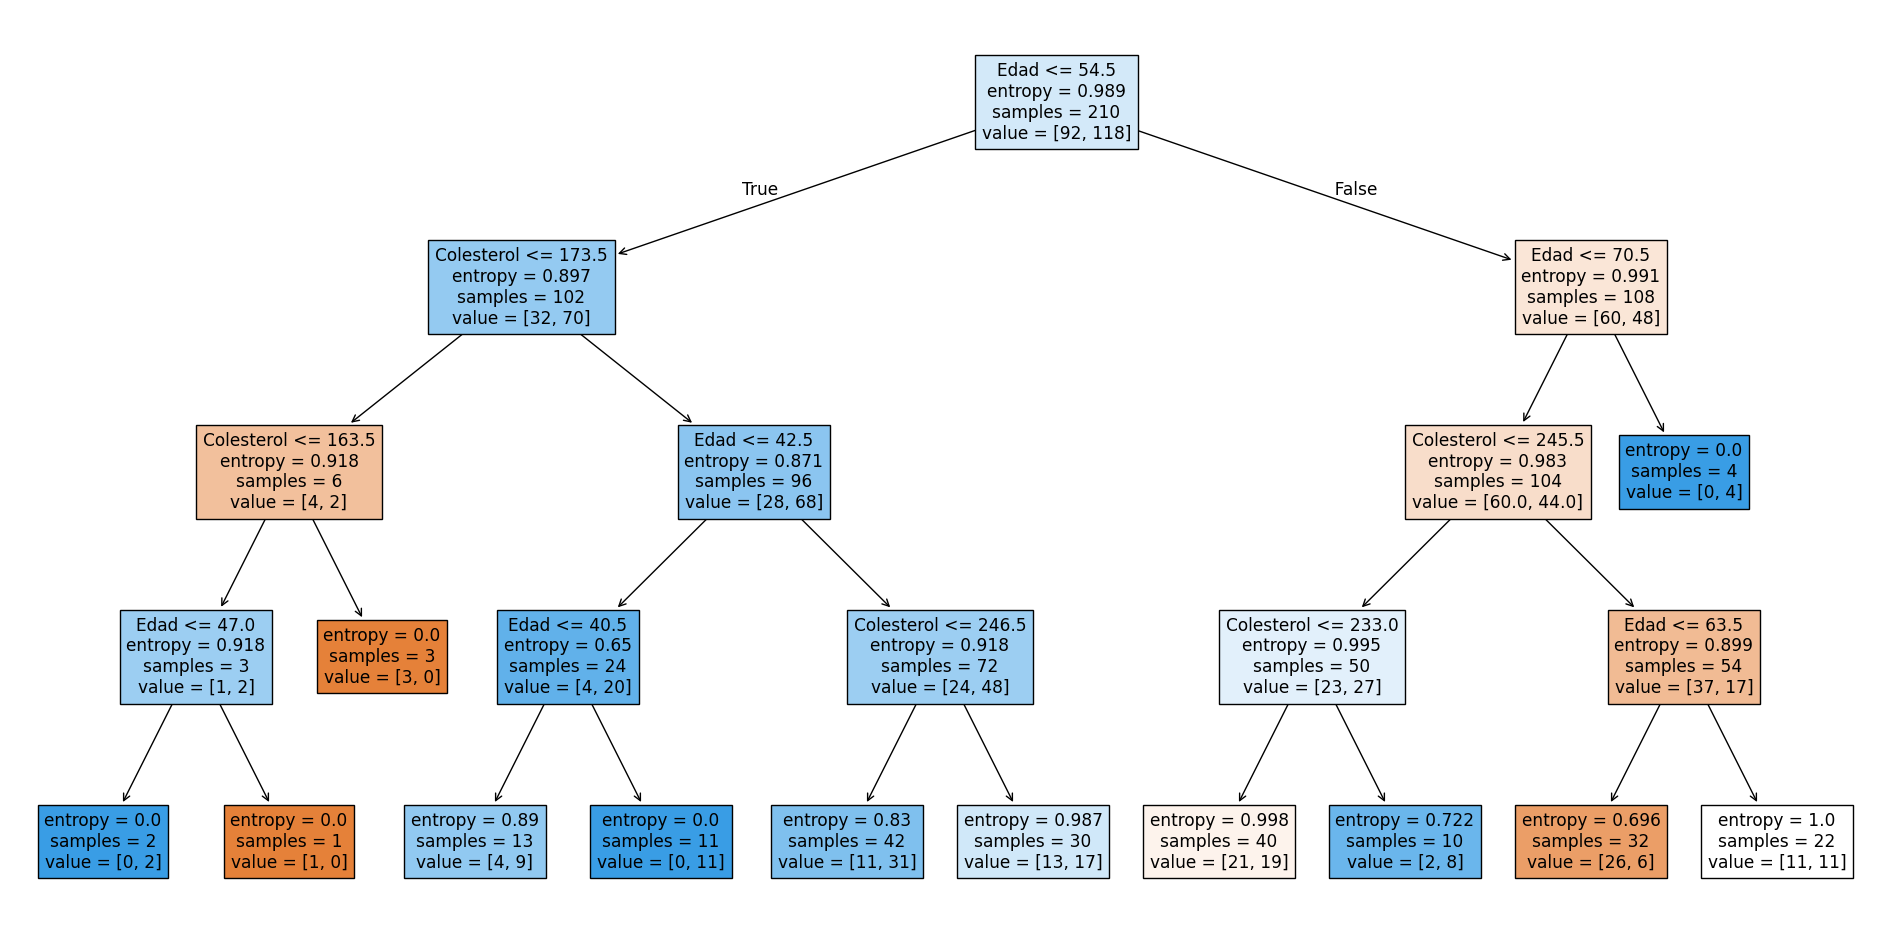

In [92]:
# Importamos el módulo 'tree' de la biblioteca 'sklearn' para trabajar con árboles de decisión
from sklearn import tree
import matplotlib.pyplot as plt  # Asegúrate de importar matplotlib para graficar

# Creamos un clasificador de árbol de decisión utilizando el criterio de "entropía" para evaluar la calidad de las divisiones
arbol_decision = tree.DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Ajustamos el modelo del árbol de decisión a los datos de entrenamiento (características y clases)
# 'fit' entrena el clasificador utilizando 'datos_entrena' y 'clase_entrena'
arbol = arbol_decision.fit(datos_entrena, clase_entrena)

# Evaluamos la precisión del modelo utilizando el conjunto de prueba
# 'score' calcula la precisión del clasificador en los datos de prueba
accuracy = arbol_decision.score(datos_prueba, clase_prueba)

# Imprimimos la precisión del modelo en el conjunto de prueba
print(f'Precisión del modelo: {round(accuracy, 2)}')

# Exportamos y mostramos el texto del árbol de decisión entrenado, indicando los nombres de las características
print(tree.export_text(arbol, feature_names=["Edad", "Colesterol"]))

# Creamos una figura con un tamaño específico para visualizar el árbol de decisión
plt.figure(figsize=(24, 12))

# Dibujamos el árbol de decisión utilizando 'plot_tree', especificando los nombres de las características
# y colorando automáticamente las hojas según su clase
tree.plot_tree(arbol, feature_names=["Edad", "Colesterol"], filled=True)

# Mostramos el gráfico del árbol de decisión
plt.show()

# Clasifica a nuevos pacientes

In [94]:
print("Nuevos datos de 3 pacientes", arbol_decision.predict([[70, 200], [47, 110], [25, 90]]))

Nuevos datos de 3 pacientes [0 1 1]


c:\Users\JORGE LUIS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
